In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Corrected Boston Housing data by Bivand, Nowosad and Lovelace
# https://jakubnowosad.com/spData/reference/boston.html
df = pd.read_csv("boston_corrected.tsv", sep='\t', skiprows=9)

In [3]:
df.head(2)

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OBS.     506 non-null    int64  
 1   TOWN     506 non-null    object 
 2   TOWN#    506 non-null    int64  
 3   TRACT    506 non-null    int64  
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   MEDV     506 non-null    float64
 7   CMEDV    506 non-null    float64
 8   CRIM     506 non-null    float64
 9   ZN       506 non-null    float64
 10  INDUS    506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  NOX      506 non-null    float64
 13  RM       506 non-null    float64
 14  AGE      506 non-null    float64
 15  DIS      506 non-null    float64
 16  RAD      506 non-null    int64  
 17  TAX      506 non-null    int64  
 18  PTRATIO  506 non-null    float64
 19  B        506 non-null    float64
 20  LSTAT    506 non-null    float64
dtypes: float64(14), 

In [27]:
# CMEDV = corrected median house value
y = df.CMEDV
print(y.shape)
print(y[:3])

(506,)
0    24.0
1    21.6
2    34.7
Name: CMEDV, dtype: float64


In [26]:
X = np.array(df.RM).reshape(-1,1)
print(X.shape)
print(X[:3])

(506, 1)
[[6.575]
 [6.421]
 [7.185]]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: {}, X_test shape: {}, y_train shape: {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape: (404, 1), X_test shape: (102, 1), y_train shape: (404,), y_test shape (102,)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test).reshape(-1,1)
print(y_pred.shape)
y_pred[:3]

(102, 1)


array([[23.73724121],
       [26.93319965],
       [19.69089617]])

In [30]:
print(model.coef_)
print(model.intercept_)

[9.34490772]
-36.21968671198455


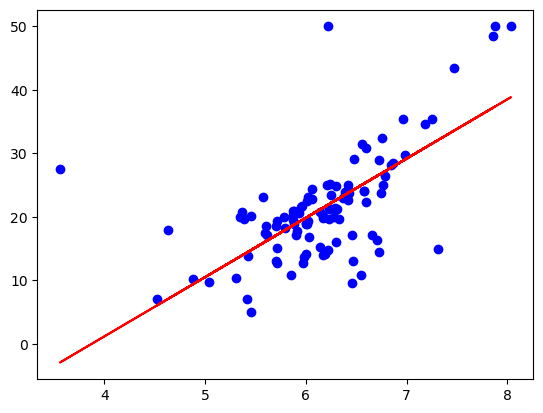

In [36]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.show()

ValueError: x and y must be the same size

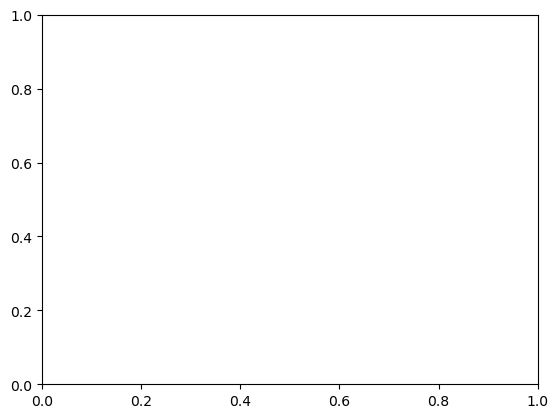

In [23]:
# RM = rooms, LSTAT = working class, PTRATIO = pupil:teacher ratio 
X = df[['RM', 'LSTAT', 'PTRATIO']]
X[:3]